In [8]:
# Importing necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = pd.read_csv("Groceries_dataset.csv")

# Display the first few rows of the dataset
print(data.head())

# Data preprocessing
# Convert transaction data into a list of lists
transactions = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).values.tolist()

# One-hot encoding
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori algorithm with lower support threshold
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)

# Association rules with lower lift threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Display frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
Frequent Itemsets:
      support                           itemsets
0    0.004010            (Instant food products)
1    0.021386                         (UHT-milk)
2    0.001470                 (abrasive cleaner)
3    0.001938                 (artif. sweetener)
4    0.008087                    (baking powder)
..        ...                                ...
745  0.001136  (rolls/buns, sausage, whole milk)
746  0.001002     (rolls/buns, soda, whole milk)
747  0.001337   (rolls/buns, whole milk, yogurt)
748  0.001069        (sausage, soda, whole milk)
749  0.001470      (sausage, whole milk, yogurt)

[750 rows x 2 columns]

Association Rules:
               antecedents            consequents  antecedent suppo

In [9]:
data.shape

(38765, 3)

In [10]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

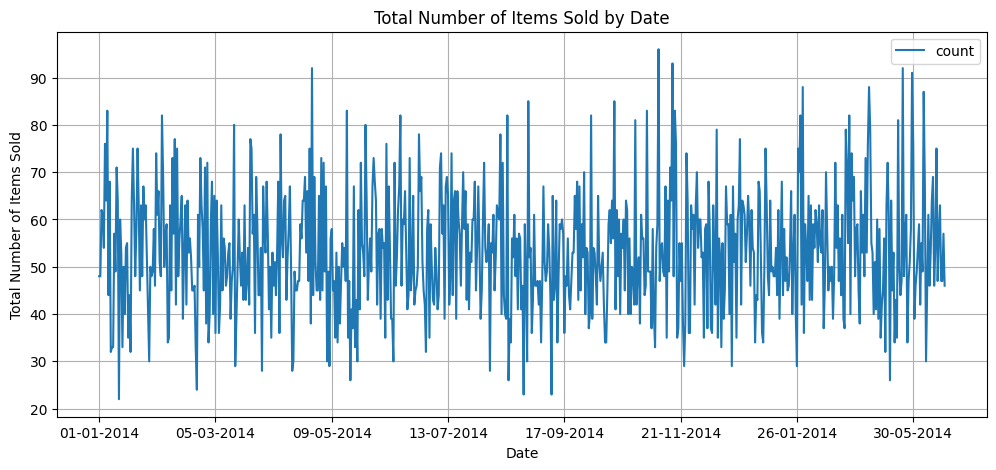

In [11]:
data.groupby(['Date'])['itemDescription'].agg(['count']).plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [13]:
d=data.set_index(['Date'])
d

,Member_number,itemDescription
Date,,
21-07-2015,1808,tropical fruit
05-01-2015,2552,whole milk
19-09-2015,2300,pip fruit
12-12-2015,1187,other vegetables
01-02-2015,3037,whole milk
...,...,...
08-10-2014,4471,sliced cheese
23-02-2014,2022,candy
16-04-2014,1097,cake bar


In [14]:
# Importing necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = pd.read_csv("Groceries_dataset.csv")

# Display the first few rows of the dataset
print(data.head())

# Data preprocessing
# Convert transaction data into a list of lists
transactions = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).values.tolist()

# One-hot encoding
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
Frequent Itemsets:
     support                        itemsets
0   0.021386                      (UHT-milk)
1   0.033950                          (beef)
2   0.021787                       (berries)
3   0.016574                     (beverages)
4   0.045312                  (bottled beer)
..       ...                             ...
64  0.010559  (rolls/buns, other vegetables)
65  0.014837  (other vegetables, whole milk)
66  0.013968        (rolls/buns, whole milk)
67  0.011629              (soda, whole milk)
68  0.011161            (whole milk, yogurt)

[69 rows x 2 columns]

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lif